In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/nlp-getting-started/train.csv


# Livelossplot- to plot training and loss in real time to check for overfitting mostly

In [5]:
!pip install livelossplot
from livelossplot import PlotLossesKeras

# Reading th data

In [68]:
df = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
tf = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

In [69]:
tf.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [79]:
from collections import Counter
d = {}
d = defaultdict(lambda:0,d)
for i in df['text']:
    wordarray = i.split(' ')
    for j in wordarray:
        if j.isalnum():
            continue
        elif 'http' in j:
            continue
        elif '#' in j:
            continue
        else:
            d[j] += 1
# d

defaultdict(<function __main__.<lambda>()>,
            {'Sask.': 1,
             "'shelter": 1,
             "place'": 1,
             'officers.': 1,
             '13,000': 1,
             '': 770,
             '=>': 1,
             'Hwy.': 4,
             '-': 762,
             'Manitou,': 1,
             "I'm": 222,
             'woods...': 1,
             "There's": 11,
             'area...': 2,
             'hah-': 1,
             'days.': 5,
             "I've": 37,
             "What's": 17,
             'man?': 1,
             'goooooooaaaaaal!!!!!!': 1,
             'ridiculous....': 1,
             ';)': 6,
             'day!': 3,
             'way...I': 1,
             "can't": 70,
             'week!': 1,
             ':)': 16,
             'pasta?': 1,
             'end!': 1,
             '@bbcmtd': 1,
             'heavy.': 1,
             'news:Nigeria': 1,
             'Aba.': 1,
             'more!': 3,
             '@PhDSquares': 1,
             "they've": 4,
      

# Removing all urls and unusual characters that I found while searching the dataset

In [8]:
import re, string
split_text = []
for i in df['text']:
    a = i.split(' ')
    for j in range(len(a)):
        if 'http' in a[j]:
            a[j] = ''
        elif 'Ûªs' in a[j]:
            a[j] = ''
        elif ':)' in a[j]:
            a[j] = ''
        elif ';)' in a[j]:
            a[j] = ''
        elif 'ÛÒ' in a[j]:
            a[j] = ''
        elif '\x' in  a[j]:
            a[j] = ''
        elif '&amp;' in a[j]:
            a[j] = ''
        elif ':(' in a[j]:
            a[j] = ''
        elif '3:' in a[j]:
            a[j] = ''
        elif '9:' in a[j]:
            a[j] = ''
        else:
            val = ''
            for ch in a[j]:
                if ch.isalnum():
                    val += ch
            a[j] = val
        a[j] = a[j].lower()
    while '' in a:
        a.remove('')
    split_text.append(a)

df['text'] = split_text

In [9]:
split_text = []
for i in tf['text']:
    a = i.split(' ')
    for j in range(len(a)):
        if 'http' in a[j]:
            a[j] = ''
        elif 'Ûªs' in a[j]:
            a[j] = ''
        else:
            val = ''
            for ch in a[j]:
                if ch.isalnum():
                    val += ch
            a[j] = val
        a[j] = a[j].lower()
    while '' in a:
        a.remove('')
    split_text.append(a)

tf['text'] = split_text

# Removing most common words such as 'the', 'a'... and least common words which occur only once

In [10]:
from collections import Counter
c = Counter()
for i in df['text']:
    c.update(i)
c.most_common()

[('the', 3248),
 ('a', 2169),
 ('in', 1975),
 ('to', 1943),
 ('of', 1822),
 ('and', 1410),
 ('i', 1362),
 ('is', 943),
 ('for', 889),
 ('on', 851),
 ('you', 786),
 ('my', 672),
 ('with', 572),
 ('it', 560),
 ('that', 559),
 ('at', 538),
 ('by', 517),
 ('this', 474),
 ('from', 419),
 ('are', 401),
 ('be', 401),
 ('was', 384),
 ('have', 384),
 ('like', 344),
 ('as', 329),
 ('up', 320),
 ('just', 315),
 ('so', 315),
 ('me', 314),
 ('but', 310),
 ('amp', 298),
 ('im', 295),
 ('not', 293),
 ('your', 292),
 ('out', 269),
 ('its', 262),
 ('after', 258),
 ('will', 257),
 ('all', 255),
 ('no', 251),
 ('an', 250),
 ('fire', 248),
 ('has', 248),
 ('when', 243),
 ('if', 240),
 ('we', 232),
 ('get', 228),
 ('new', 224),
 ('via', 220),
 ('now', 218),
 ('more', 216),
 ('about', 212),
 ('or', 200),
 ('what', 198),
 ('people', 196),
 ('he', 193),
 ('they', 191),
 ('been', 191),
 ('one', 191),
 ('how', 190),
 ('dont', 189),
 ('over', 187),
 ('news', 186),
 ('who', 179),
 ('into', 173),
 ('do', 168),
 ('

# STOPWORDS are words which occur frequently and don't add much to the context

In [11]:
from gensim.parsing.preprocessing import STOPWORDS
context_words = []
impwords = ['fire','emergency','disaster','police','burning','body','crash','suicide','buildings','bomb','nuclear',]
for i in df['text']:
    a = []
    for j in i:
        if c[j] <= 1000 and c[j] > 1:
            a.append(j)
        elif j in impwords:
            a.append(j)
        elif j in df['keyword']:
            a.append(j)
    context_words.append(a)
df['context'] = context_words

In [12]:
context_words = []
for i in tf['text']:
    a = []
    for j in i:
        if c[j] <= 1000 and c[j] > 1:
            a.append(j)
        elif j in impwords:
            a.append(j)
        elif j in df['keyword']:
            a.append(j)
    context_words.append(a)
tf['context'] = context_words

# Checking if some sentences are completely reduced to a word and count of sentence lenght as a dict

In [13]:
from collections import defaultdict
d = {}
d = defaultdict(lambda:0,d)
for i in df['context'][df['target'] == 1]:
    d[len(i)] += 1
    if len(i) == 1:
        print(i)
print(d)

['annihilated']
['annihilation']
['armageddon']
['drowning']
['fatality']
['flooding']
['too']
['hurricane']
['meltdown']
['mudslide']
['rioting']
['sandstorm']
['screaming']
['hiroshima']
['wreck']
defaultdict(<function <lambda> at 0x7feb040c0950>, {11: 243, 5: 127, 18: 92, 7: 248, 13: 234, 8: 265, 9: 285, 21: 22, 6: 167, 3: 54, 12: 261, 16: 156, 14: 244, 4: 97, 15: 202, 2: 30, 19: 53, 10: 305, 1: 15, 17: 118, 20: 27, 24: 6, 23: 10, 22: 6, 0: 4})


# Stemming the sentences before applying word2vec

In [14]:
from gensim.parsing.porter import PorterStemmer
p = PorterStemmer()
stem_text = []
for i in df['context']:
    stem_text.append(p.stem_documents(i))

In [15]:
df['stem'] = stem_text

In [16]:
stem_text = []
for i in tf['context']:
    stem_text.append(p.stem_documents(i))

In [17]:
tf['stem'] = stem_text

# Applying word2vec on the data

In [18]:
from gensim.models import Word2Vec
wvmodel = Word2Vec()

In [19]:
wvmodel.build_vocab(pd.concat([df['context'],tf['context']]), progress_per=10000)

In [20]:
wvmodel.train(pd.concat([df['context'],tf['context']]), total_examples=wvmodel.corpus_count, epochs=30, report_delay=1)

(2869706, 3403020)

In [21]:
wvmodel['reason']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.18456346, -0.34738207,  0.12116159, -0.07424667, -0.15530793,
        0.03496593,  0.2498334 , -0.68619674,  0.59163123,  0.09533227,
        0.41388625,  0.01270539,  0.5695364 , -0.17542955, -0.18087626,
       -0.10090131,  0.9052244 , -0.39184397, -0.34602392, -0.2844083 ,
        0.314912  ,  0.7022588 ,  0.06297132, -0.07792866, -0.5503494 ,
       -0.91280705, -0.35141534, -0.15608063,  0.1532562 ,  0.12529567,
       -0.40231517, -0.06093369, -0.3901179 ,  0.48485237,  0.2849894 ,
        0.35150197, -0.40288737, -0.4393312 ,  0.3375412 ,  0.6482903 ,
        0.08345117, -1.2023764 ,  0.6748277 ,  0.4360386 , -0.13452262,
       -0.05871979,  0.05827836, -0.53050846,  0.33885798, -0.32717022,
        0.13354716, -0.67668635, -0.17280622, -0.5107706 , -0.20165847,
        0.1048796 , -0.5348356 ,  0.07313557, -0.36998662, -0.4568983 ,
       -0.77333295,  0.6436622 , -0.02617427,  0.6567091 , -0.12822607,
        0.05871684, -0.76169306, -0.22583352,  0.7824297 , -0.09

In [22]:
defect = []
for i in df['context']:
    for j in i:
        if j not in wvmodel.wv.vocab:
            defect.append(j)
print(set(defect))

{'describes', 'themed', 'tragic', 'mufc', 'eaten', 'dignity', 'certificate', 'permanently', '96', 'grills', 'clev', 'choose', 'score', 'coat', 'downfall', '78', 'drinks', 'idps', 'items', 'whistle', 'egged', 'shoulders', 'background', 'displace', 'claytonbryant', 'novel', 'mû', 'volcanoåêinåêrussia', 'swing', 'seduction', 'wwi', 'vida', 'sixth', '1100', 'nightmare', 'conversations', 'contemplating', 'locked', 'hoping', 'aggressive', 'forth', 'zarry', 'cheat', 'supernatural', 'obispo', 'kosciusko', 'responder', 'nails', 'niall', 'turbine', 'warn', 'wipp', 'disappeared', 'bundled', 'barry', 'healthcare', 'tryout', 'bu', 'hew', 'pillows', 'manutd', 'inning', 'temporary300', 'cas', 'modi', 'imported', 'antonio', 'cockpit', 'demon', 'raì¼l', '06jst', 'poss', 'misses', 'repay', 'denier', 'whipped', 'abusing', 'porridge', 'thisiswhywecanthavenicethings', 'signing', 'rightwaystan', 'saturn', 'backpack', 'ûïa', 'pit', 'tens', 'wce', 'snd', 'vid', 'gorgeous', 'transformed', 'becoming', 'apt', 'a

In [23]:
l = 0
for i in df['context']:
    if len(i)>l:
        l = len(i)
print(l)

28


# Reshaping the diffrent length vectors into a 0 padded vector of lenght 30

In [24]:
traindata = []
for i in df['context']:
    a = np.zeros((100,1))
    for j in i:
        if j in wvmodel.wv.vocab:
            a = np.concatenate((a,np.reshape(wvmodel[j],(100,1))),axis=1)
    while len(a[0]) < 30:
        a = np.concatenate((a,np.zeros((100,1))),axis=1)
    traindata.append(a)
# df['traindata'] = traindata
traindata[0].shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(100, 30)

In [25]:
defect = []
for i in tf['context']:
    for j in i:
        if j not in wvmodel.wv.vocab:
            defect.append(j)
print(defect)

['fleeing', 'birmingham', 'nsfw', 'hall', 'builds', 'cleared', 'prone', 'pretend', 'calum5sos', 'que', 'scars', 'aviation', 'coahuila', 'coahuila', 'penn', '36', 'wedn', 'wedn', 'heroin', 'nhs', 'fraction', 'drama', 'drama', 'minions', 'friendship', 'punished', 'treated', 'si', 'cue', 'item', 'exited', 'proof', 'items', 'videoveranomtv', 'britney', 'del', 'rey', 'lions', 'lions', 'quartz', '5sosfam', 'forth', '5sosfam', 'push', 'shira', 'theadvocatemag', 'theadvocatemag', 'shira', 'guilty', 'vegetarian', 'letter', 'jailed', 'mc', 'christ', 'removing', 'bail', 'hospitals', 'innovation', 'snapchat', 'cooper', 'psychological', 'labour', 'nsfw', 'hatchet', 'earned', 'bitcoin', 'protecting', 'installation', 'plenty', 'spray', 'performance', 'chevy', 'recreates', 'tix', 'frozen', 'fury', 'mgm', 'grand', 'recreates', 'lone', 'growing', 'gallipoli', 'omega', 'gallipoli', 'consequences', 'pathogen', 'corp', 'acted', 'grounds', 'risks', 'discusses', 'channels', 'pathogen', 'discusses', 'channels

In [26]:
testdata = []
for i in tf['context']:
    a = np.zeros((100,1))
    for j in i:
        if j in wvmodel.wv.vocab:
            a = np.concatenate((a,np.reshape(wvmodel[j],(100,1))),axis=1)
    while len(a[0]) < 30:
        a = np.concatenate((a,np.zeros((100,1))),axis=1)
    testdata.append(a)
# df['traindata'] = traindata
testdata[0].shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(100, 30)

In [27]:
df.head()

,id,keyword,location,text,target,context,stem
0,1,NaN,NaN,"[our, deeds, are, the, reason, of, this, earth...",1,"[our, deeds, are, reason, this, earthquake, ma...","[our, deed, ar, reason, thi, earthquak, mai, a..."
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1,"[forest, fire, near, la, canada]","[forest, fire, near, la, canada]"
2,5,NaN,NaN,"[all, residents, asked, to, shelter, in, place...",1,"[all, residents, asked, shelter, place, are, b...","[all, resid, ask, shelter, place, ar, be, by, ..."
3,6,NaN,NaN,"[13000, people, receive, wildfires, evacuation...",1,"[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ..."
4,7,NaN,NaN,"[just, got, sent, this, photo, from, ruby, ala...",1,"[just, got, sent, this, photo, from, alaska, a...","[just, got, sent, thi, photo, from, alaska, as..."


In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten,Input,Add
from keras.optimizers import Adam
from keras.models import Model
from keras.preprocessing.text import Tokenizer

# Tokenizing the contexted data for an embedding model

In [29]:
tokenizer = Tokenizer(num_words=len(wvmodel.wv.vocab))
tokenizer.fit_on_texts(df['context'])
X_train = tokenizer.texts_to_sequences(df['context'])
X_test = tokenizer.texts_to_sequences(tf['context'])

# Simple Multi Layer perceptron- will work with the word2vec data (traindata,testdata)

In [40]:
# define the model
model = Sequential()
model.add(Input(shape=(100,30)))
model.add(Flatten())
model.add(Dense(512,input_dim=100,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3000)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               1536512   
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_15 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                

In [30]:
inplayer = Input(shape = (100,30))
flat = Flatten()(inplayer)
layer1 = Dense(64,activation='relu')(flat)
layer2 = Dense(64,activation='relu')(layer1)
add1 = Add()([layer1,layer2])
layer3 = Dense(64,activation='relu')(add1)
add2 = Add()([layer1,layer2,layer3])
layer4 = Dense(64,activation='relu')(add2)
add3 = Add()([layer1,layer2,layer3,layer4])
layer5 = Dense(64,activation='relu')(add3)
layer6 = Add()([layer2,layer3,layer4,layer5])
layer7 = Dense(64,activation='relu')(layer6)
layer8 = Dense(1,activation='sigmoid')(layer7)
model = Model(inputs=inplayer,outputs=layer8)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 30)]    0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 3000)         0           input_1[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 64)           192064      flatten[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 64)           4160        dense[0][0]                      
______________________________________________________________________________________________

In [44]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 30
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_train = np.reshape(X_train,(7613,30,1))
X_train.shape

(7613, 30, 1)

In [57]:
from keras.models import Sequential
from keras.layers import *

embedding_dim = 100

model = Sequential()
model.add(Embedding(input_dim=len(wvmodel.wv.vocab), 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
# model.add(SpatialDropout1D(0.2))
# model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
# model.add(Dropout(0.25))
# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
optimizer = Adam(learning_rate=0.00004)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 30, 100)           363600    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                34048     
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 65        
Total params: 401,873
Trainable params: 401,873
Non-trainable params: 0
_________________________________________________________________


In [58]:
train = np.asarray(traindata)
y = np.asarray(df['target'])

In [59]:
testdata = np.asarray(testdata)

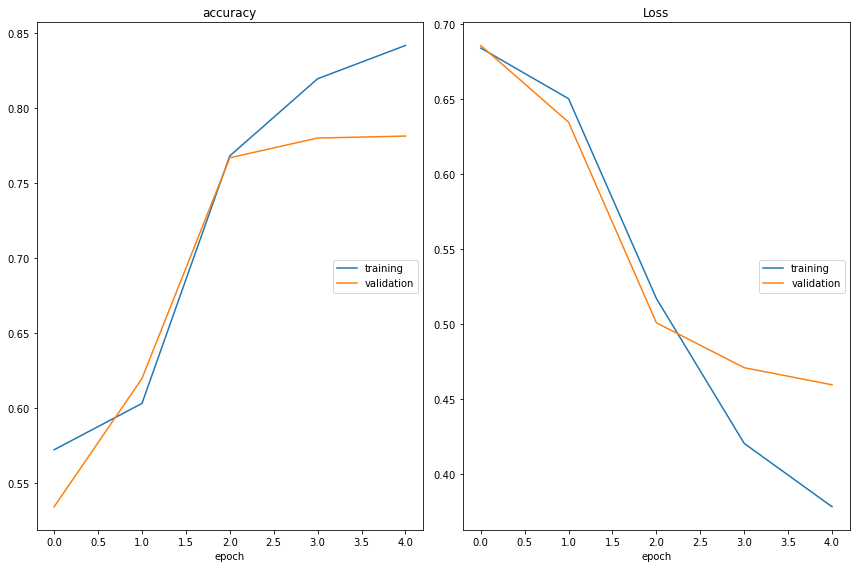

accuracy
	training         	 (min:    0.572, max:    0.842, cur:    0.842)
	validation       	 (min:    0.534, max:    0.781, cur:    0.781)
Loss
	training         	 (min:    0.378, max:    0.684, cur:    0.378)
	validation       	 (min:    0.460, max:    0.686, cur:    0.460)
609/609 [==============================] - 9s 15ms/step - loss: 0.3783 - accuracy: 0.8417 - val_loss: 0.4597 - val_accuracy: 0.7814


In [60]:
model.fit(X_train,y,epochs=5, batch_size=10,callbacks=[PlotLossesKeras()],validation_split=0.2)

In [63]:
y = model.predict_classes(X_test)

In [62]:
y = model.predict(testdata)

ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1122 predict_step  **
        return self(x, training=False)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:277 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py:719 call
        convert_kwargs_to_constants=base_layer_utils.call_context().saving)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py:888 _run_internal_graph
        output_tensors = layer(computed_tensors, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/layers/wrappers.py:531 __call__
        return super(Bidirectional, self).__call__(inputs, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:886 __call__
        self.name)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:180 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer bidirectional_5 is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: [None, 100, 30, 100]


In [ ]:
ans = []
for i in y:
    if i < 0.5:
        ans.append(0)
    else:
        ans.append(1)
y = ans

In [64]:
submission = pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv')

In [65]:
submission['target'] = y

In [66]:
submission.to_csv('submission.csv',index=False)